In [1]:
%matplotlib inline
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
current_dir = os.getcwd()
# sess = tf.InteractiveSession()

# os.makedirs("/tmp/model")
# os.makedirs("/tmp/model-subset")


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# training step

xs = tf.placeholder(tf.float32, shape=[None, 784])
ys = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, shape=[-1, 28, 28, 1])

#layer1
Weights_conv1 = tf.Variable(tf.truncated_normal(shape=[5,5,1,32], stddev=0.1), dtype=tf.float32, name='W_conv1')
biases_conv1 = tf.Variable(tf.constant(0.1, shape=[32]), dtype=tf.float32, name='b_conv1')
conv_1 = tf.nn.relu(tf.nn.conv2d(x_image, Weights_conv1, strides=[1,1,1,1], padding='SAME') + biases_conv1)
pool_layer1 = tf.nn.max_pool(conv_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  # outputs.shape = [n_samples, 14,14,32]

#layer2
Weights_conv2 = tf.Variable(tf.truncated_normal(shape=[5,5,32,48], stddev=0.1), dtype=tf.float32, name='W_conv2')
biases_conv2 = tf.Variable(tf.constant(0.1, shape=[48]), dtype=tf.float32, name='b_conv2')
conv_2 = tf.nn.relu(tf.nn.conv2d(pool_layer1, Weights_conv2, strides=[1,1,1,1], padding='SAME') + biases_conv2)  # outputs.shape = [n_samples, 14,14,48]
# pool_layer2 = tf.nn.max_pool(conv_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  

#layer3
Weights_conv3 = tf.Variable(tf.truncated_normal(shape=[5,5,48,64], stddev=0.1), dtype=tf.float32, name='W_conv3')
biases_conv3 = tf.Variable(tf.constant(0.1, shape=[64]), dtype=tf.float32, name='b_conv3')
conv_3 = tf.nn.relu(tf.nn.conv2d(conv_2, Weights_conv3, strides=[1,1,1,1], padding='SAME') + biases_conv3)
pool_layer3 = tf.nn.max_pool(conv_3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  #outputs.shape = [n_samples, 7,7,64]

#fulled layer1
Weights_fc1 = tf.Variable(tf.truncated_normal(shape=[7*7*64, 1024], stddev=0.1), dtype=tf.float32, name='W_fc1')
biases_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]), dtype=tf.float32, name='b_fc1')
fc1 = tf.reshape(pool_layer3, shape=[-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(fc1, Weights_fc1) + biases_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#fulled layer2
Weights_fc2 = tf.Variable(tf.truncated_normal(shape=[1024, 10], stddev=0.1), dtype=tf.float32, name='W_fc2')
biases_fc2 = tf.Variable(tf.constant(0.1, shape=[10]), dtype=tf.float32, name='b_fc2')
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, Weights_fc2) + biases_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 1))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for i in range(10001):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob:0.5})
        if i % 1000 == 0:
            y_pre = sess.run(prediction, feed_dict={xs: mnist.test.images, ys: mnist.test.labels, keep_prob: 1})
            correct_prediction = tf.equal(tf.argmax(y_pre, 1), tf.argmax(mnist.test.labels, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            result = sess.run(accuracy, feed_dict={xs: mnist.test.images, ys: mnist.test.labels, keep_prob: 1})
#             print sess.run(correct_prediction, feed_dict={xs:mnist.test.images, ys:mnist.test.labels, keep_prob: 1})
            print result
    save_path = saver.save(sess, current_dir + '/models/model_test.ckpt')


0.0754
0.9701
0.9788
0.9843
0.988
0.9881
0.9902
0.9894
0.9901
0.991
0.9917


In [4]:
# testing

sess = tf.InteractiveSession()

xs = tf.placeholder(tf.float32, shape=[None, 784])
ys = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, shape=[-1, 28, 28, 1])

#layer1
Weights_conv1 = tf.Variable(tf.truncated_normal(shape=[5,5,1,32], stddev=0.1), dtype=tf.float32, name='W_conv1')
biases_conv1 = tf.Variable(tf.constant(0.1, shape=[32]), dtype=tf.float32, name='b_conv1')
conv_1 = tf.nn.relu(tf.nn.conv2d(x_image, Weights_conv1, strides=[1,1,1,1], padding='SAME') + biases_conv1)
pool_layer1 = tf.nn.max_pool(conv_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  # outputs.shape = [n_samples, 14,14,32]

#layer2
Weights_conv2 = tf.Variable(tf.truncated_normal(shape=[5,5,32,48], stddev=0.1), dtype=tf.float32, name='W_conv2')
biases_conv2 = tf.Variable(tf.constant(0.1, shape=[48]), dtype=tf.float32, name='b_conv2')
conv_2 = tf.nn.relu(tf.nn.conv2d(pool_layer1, Weights_conv2, strides=[1,1,1,1], padding='SAME') + biases_conv2)  # outputs.shape = [n_samples, 14,14,48]
# pool_layer2 = tf.nn.max_pool(conv_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  

#layer3
Weights_conv3 = tf.Variable(tf.truncated_normal(shape=[5,5,48,64], stddev=0.1), dtype=tf.float32, name='W_conv3')
biases_conv3 = tf.Variable(tf.constant(0.1, shape=[64]), dtype=tf.float32, name='b_conv3')
conv_3 = tf.nn.relu(tf.nn.conv2d(conv_2, Weights_conv3, strides=[1,1,1,1], padding='SAME') + biases_conv3)
pool_layer3 = tf.nn.max_pool(conv_3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  #outputs.shape = [n_samples, 7,7,64]

#fulled layer1
Weights_fc1 = tf.Variable(tf.truncated_normal(shape=[7*7*64, 1024], stddev=0.1), dtype=tf.float32, name='W_fc1')
biases_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]), dtype=tf.float32, name='b_fc1')
fc1 = tf.reshape(pool_layer3, shape=[-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(fc1, Weights_fc1) + biases_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#fulled layer2
Weights_fc2 = tf.Variable(tf.truncated_normal(shape=[1024, 10], stddev=0.1), dtype=tf.float32, name='W_fc2')
biases_fc2 = tf.Variable(tf.constant(0.1, shape=[10]), dtype=tf.float32, name='b_fc2')
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, Weights_fc2) + biases_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 1))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

saver = tf.train.Saver()

saver.restore(sess, os.path.join(current_dir, 'models/model_test.ckpt'))

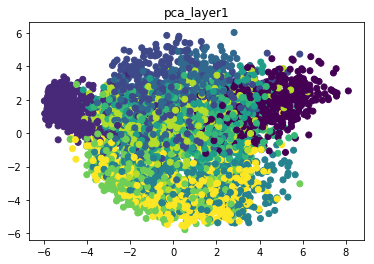

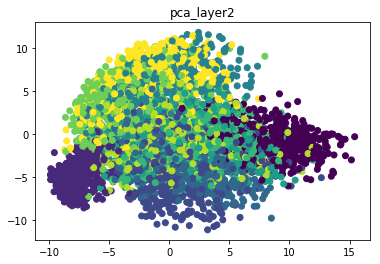

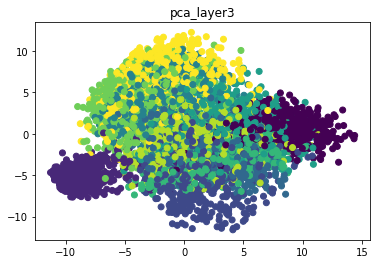

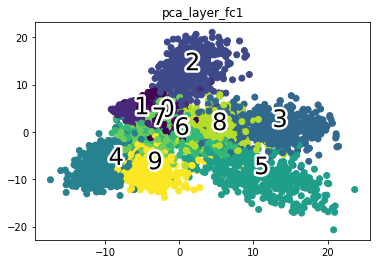

In [17]:
def pca(X, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    return pca.transform(X)

def tsne(X, n_components):
    model = TSNE(n_components=2, perplixity=40)
    return model.fit_transform(X)

def plot_scatter(x, labels, title, txt=False):
    plt.title(title)
    ax = plt.subplot()
    ax.scatter(x[:,0], x[:,1], c=labels)
    txts = []
    if txt:
        for i in range(10):
            xtext, ytext = np.median(x[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
            txts.append(txt)
    plt.show()
    
    
test_size = 5000
test_data = mnist.test.images[0:text_size, :]
test_label = mnist.test.labels[0:test_size, :]
test_label_index = np.argmax(test_label, axis = 1)

# pca visualization
layer1_output_reshape = tf.reshape(pool_layer1[:,:,:,:], shape=[-1, 14*14*32])
test_layer1_pca = pca(layer1_output_reshape.eval(feed_dict = {xs:test_data}), 2)
plot_scatter(test_layer1_pca, test_label_index, 'pca_layer1')

layer1_output_reshape = tf.reshape(conv_2, shape=[-1, 14*14*48])
test_layer2_pca = pca(layer1_output_reshape.eval(feed_dict = {xs:test_data}), 2)
plot_scatter(test_layer2_pca, test_label_index, 'pca_layer2')
    
layer1_output_reshape = tf.reshape(pool_layer3, shape=[-1, 7*7*64])
test_layer3_pca = pca(layer1_output_reshape.eval(feed_dict = {xs:test_data}), 2)
plot_scatter(test_layer3_pca, test_label_index, 'pca_layer3')

test_layerfc1_pca = pca(h_fc1.eval(feed_dict = {xs:test_data}), 2)
plot_scatter(test_layerfc1_pca, test_label_index, 'pca_layer_fc1', txt=True)
